In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [47]:
def generate_bits(n_x, m):
# Generate a m x n_x array of ints between 0 and 1, inclusive:
# m: number of rows
# n_x : number of columns per rows/ feature set
    np.random.seed(1)
    data = np.random.randint(2, size=(n_x, m))
    return(data)

In [48]:
# Create labels for traingin and updating derivatives of parameter weight and bias , 
# the loss function determine the difference between actual values and the activation values. 
# The actal value is the value that each example(row) has as it label. 
# like the actual value of OR operation : 
# 1 + 0  = 1= actualValue > : [or operation =+] 

# The generate_label function below takes data as input and apply XOR operation 
# row wise 


In [49]:
def generate_label(data, m):
    # generate label by appyling xor operation to individual row
    # return list of label (results)
        # data: binary data set of m by n_x size
    lst_y = []
    y= np.empty((m,1))
    k = 0
    for tmp in data.T:
        xor = np.logical_xor(tmp[0], tmp[1])

        for i in range(2, tmp.shape[0]):
            xor = np.logical_xor(xor, tmp[i])
    #     print(xor)
        lst_y.append(int(xor))
        y[k,:] = int(xor)
        k+=1
    return(y.T)

In [50]:
data = generate_bits(2, 100)

In [51]:
data

array([[1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0]])

In [52]:
generate_label(data, 100)

array([[0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
        1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1.,
        1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1.,
        0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
        1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
        0., 0., 1., 1.]])

In [53]:
def sigmoid(z):
    # determine sigmoid of value
        #z: linear activation
    s = 1 / (1 + np.exp(-z))
    return s

In [54]:
def rnn_cell_compute(xt, a_prev, parameters):
    # Computes and returns activations, predcitions yhat
        #xt: input to current state
        #a_prev: activation from previous state
        #parameters: dictonary object of weights and bias
        
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    # compute next activation state using the formula given above
    a_next = np.tanh(np.dot(Wax, xt) + np.dot(Waa, a_prev) + ba)
    # compute output of the current cell using the formula given above
    yt_pred = sigmoid(np.dot(Wya, a_next) + by)

    # store values you need for backward propagation in cache
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

In [23]:
# So RNN unfolded architecture will be coming each single RNN - cell and get input 
# of features x and activations from the previous states a^(t -1 ) we have combined each RNN-cell to 
# demonstrate the architecture over t-time sequence 

# rnn_ forward the generic function that computes the acitvations and predictions based on the lenght of sequence t and get activations 
# and predictions from the rnn_cell_compute. The fucntions takes x input data, previous activations and parameters.




In [55]:
def rnn_forward(x, a0, parameters):
    # Itereate over the rnn_cell_compute function to compute activations, predictions for the states length equal to time stamp
        #x: input data with feature set and time stemp t_x
        #a0: activations at previous state
        #parameters: dictonary object of weights and bias

    caches = []
    
    # Retrieve dimensions from shapes of x and Wy
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
    ### START CODE HERE ###
    
    # initialize "a" and "y" with zeros 
    a = np.zeros((n_a, m, T_x))
    y_pred = np.zeros((n_y, m, T_x))
    
    # Initialize a_next 
    a_next = a0
    
    # loop over all time-steps
    for t in range(T_x):
        # Update next hidden state, compute the prediction, get the cache 
        a_next, yt_pred, cache = rnn_cell_compute(x[:,:,t], a_next, parameters)
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] = a_next
        # Save the value of the prediction in y 
        y_pred[:,:,t] = yt_pred
        # Append "cache" to "caches" 
        caches.append(cache)
            
    # store values needed for backward propagation in cache
    caches = (caches, x)
    
    return a, y_pred, caches

In [56]:
def initialize_param(h, n_x, n_y):
    # Intialize required paramters w's and b's
        #h: number of activations
        #n_x: number of input feature set
        #n_y: number of output node
    np.random.seed(1)
    Waa = np.random.randn(h,h)
    Wax = np.random.randn(h,n_x)
    Wya = np.random.randn(n_y,h)
    ba = np.random.randn(h,n_y)
    by = np.random.randn(1,1)
    parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}
    return(parameters)

In [57]:
def compute_cost(y, y_pred, t_x, m):
    #calculate logistic cost w.r.t. prediction yhat and actual value y
        #y: target label
        #y_pred: predicted values from network
        #t_x: length of time stemp
        #m: number of trainig examples
    y_hat = y_pred[:,:,t_x-1]
    loss = -1*(y* np.log(y_hat) + (1-y) * np.log(1-y_hat))
    cost = np.sum(loss)/m
    return(cost)

In [58]:
def derivative_output(yhat, y, a, t_x, m):
     ## compute partial derivative of parameters at output layer
        # yhat: activation from sigmoid 
        # y: target label
        # a: activation at last time stamp
    dZy = yhat - y
    dby = (1 / m) * np.sum(dZy, axis=1, keepdims=True)
    dWya = (1 / m) * np.dot(dZy, a[:,:,t_x-1].T) 
    
    gradient_output = {'dWya': dWya, 'dby': dby, 'dZy': dZy}
    return(gradient_output)

In [59]:
def rnn_cell_backward(da_next, cache):
    # compute derivatives and returns a dictonary objects of them
        #da_next: derivative of activation of next state
        #cache: tuple containing information from the forward pass (output of rnn_cell_forward())
    
    # Retrieve values from cache
    (a_next, a_prev, xt, parameters) = cache
    
    # Retrieve values from parameters
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]

    # compute the gradient of tanh with respect to a_next
    dtanh = (1 - a_next ** 2) * da_next

    # compute the gradient of the loss with respect to Wax 
    dxt = (1 / m) * Wax.T.dot(dtanh)
    dWax = (1 / m) * dtanh.dot(xt.T)

    # compute the gradient with respect to Waa
    da_prev = (1 / m) * Waa.T.dot(dtanh)
    dWaa = (1 / m) * dtanh.dot(a_prev.T)

    # compute the gradient with respect to b 
    dba = (1 / m) * np.sum(dtanh, 1, keepdims=True)

    
    
    # Store the gradients in a python dictionary
    gradients = {"dxt": dxt, "da_prev": da_prev, "dWax": dWax, "dWaa": dWaa, "dba": dba}
    
    return gradients

In [60]:
def rnn_backward(caches, y, n_a, m, T_x, yhat, a): 
    # compute every states derivatives and return them
        #cache: tuple containing information from the forward pass (rnn_forward)
        #y: target label
        #n_a: number of activation states
        #m: training examples
        #T_x: time stam
        #yhat: predicted values
        #a: activations
        
    # Retrieve values from the first cache (t=1) of caches 
    (caches, x) = caches
    (a1, a0, x1, parameters) = caches[0]
    
    # Retrieve dimensions from x1's shapes 
    n_x, m = x1.shape
    
    da = np.empty((h,m))
    
    # initialize the gradients with the right sizes (≈6 lines)
    dx = np.zeros((n_x, m, T_x))
    dWax = np.zeros((n_a, n_x))
    dWaa = np.zeros((n_a, n_a))
    dba = np.zeros((n_a, 1))
    da0 = np.zeros((n_a, 1))
    da_prevt = np.zeros((n_a, 1))
    
    # Loop through all the time steps
    for t in reversed(range(T_x)):
        # Compute gradients at time step t. Choose wisely the "da_next" and the "cache" to use in the backward propagation step.
        if (t == T_x-1):
            gradient_output = derivative_output(yhat[:,:, t], y, a, T_x, m)

            dZy = gradient_output['dZy']
            Wya = parameters['Wya']
            da = np.dot(Wya.T,dZy)
        else:
            Waa = parameters['Waa']
            da = np.dot(Waa.T,da_prevt)      
        
        gradients = rnn_cell_backward(da, caches[t])
        
        # Retrieve derivatives from gradients (≈ 1 line)
        dxt, da_prevt, dWaxt, dWaat, dbat = gradients["dxt"], gradients["da_prev"], gradients["dWax"], gradients["dWaa"], gradients["dba"]
        # Increment global derivatives w.r.t parameters by adding their derivative at time-step t (≈4 lines)
        dx[:, :, t] = dxt
        dWax += dWaxt
        dWaa += dWaat
        dba += dbat
        
    # Set da0 to the gradient of a which has been backpropagated through all time-steps (≈1 line) 
    da0 = da_prevt

    # Store the gradients in a python dictionary
    gradients = {"dx": dx, "da0": da0, "dWax": dWax, "dWaa": dWaa,"dba": dba, "dWya": gradient_output["dWya"],
                 "dby": gradient_output["dby"] }
    
    return gradients

In [61]:
def update_parameters(parameters, gradients, lr):
    # update and return parameters 
        # parameters: dictonary object of w's and b's
        # gradients: dictionary: object of gradient of w's and b's
        #lr: learning rate
        
    parameters['Waa'] = parameters['Waa'] - (lr * gradients['dWaa'])
    parameters['Wax'] = parameters['Wax'] - (lr * gradients['dWax'])
    parameters['Wya'] = parameters['Wya'] - (lr * gradients['dWya'])
    parameters['ba'] = parameters['ba'] - (lr * gradients['dba'])
    parameters['by'] = parameters['by'] - (lr * gradients['dby'])
    
    return(parameters)

In [62]:
def update_prev_a(a0, gradients, lr):
    # update and return activations
        #a0: activations before first state
        #gradients: dictionary: object of gradient of w's and b's
        #lr: learning rate
        
    a0 = a0 - (lr*gradients['da0'])
    return(a0)

In [63]:
def optimize_parameters(x, y, a0, parameters, h, m, t_x, lr, num_iter):
    # returns list of cost at each iteration and updated parameters
        #x: input data
        #y: target labels
        #a0: activation before state 1
        #parameters: dictionary objects of parameters
        #h: number of node
        #m: number of training examples
        #t_x: time stamp (length of sequence of data)
        #lr: learning rate
        #num_iter: an integer
    lst_cost = []

    for i in range(0, num_iter):
        a, yhat, caches = rnn_forward(x, a0, parameters)
        gradients = rnn_backward(caches, y, h, m, t_x, yhat, a)
        parameters = update_parameters(parameters, gradients, lr)
        cost = compute_cost(y, yhat, t_x, m)
        lst_cost.append(cost)
        a0 = update_prev_a(a0, gradients, lr)
    return (lst_cost, parameters)

In [68]:
def plt_res(lst, ylab, lr):
    #This will plot the list of values at y axis while x axis will contain number of iteration
    #lst: lst of action/cost
    #ylab: y-axis label
    #lr: learning rate
    plt.plot(lst)
    #plt.ylabel(ylab)
    plt.xlabel('iterations')
    #plt.title("Learning rate =" + str(lr))
    plt.show()

In [79]:
np.random.seed(1)

n_x = 1
t_x = 50
n_y = 1
m = 10000
lr = 0.5
h = 25 
num_iter = 20

x = generate_bits(m, t_x)
y = generate_label(x.T, m)
x = x.T.reshape(n_x,m,t_x)

a0 = np.random.randn(h,m)
parameters = initialize_param(h, n_x, n_y)

"""Uncomment below line of code to trian RNN"""
lst_cost_s, parameters_s = optimize_parameters(x, y, a0, parameters, h, m, t_x, lr, num_iter)

######################################################################################

m = 100000

x = generate_bits(m, t_x)
y = generate_label(x.T, m)
x = x.T.reshape(n_x,m,t_x)

a0 = np.random.randn(h,m)
parameters = initialize_param(h, n_x, n_y)

"""Uncomment below line of code to trian RNN"""
lst_cost_m, parameters_m = optimize_parameters(x, y, a0, parameters, h, m, t_x, lr, num_iter)

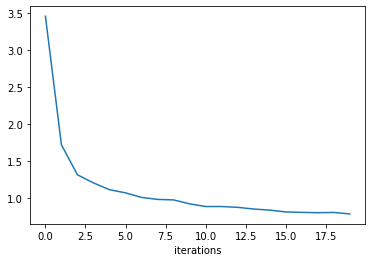

In [80]:
plt_res(lst_cost_s,3,4 )

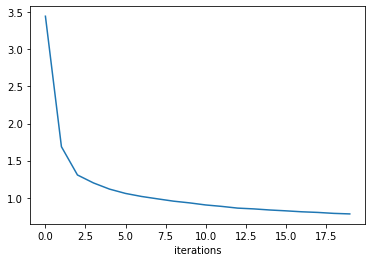

In [81]:
plt_res(lst_cost_m,3,4 )